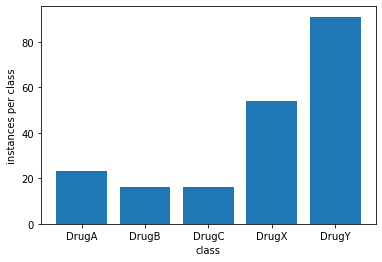

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import Perceptron
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, f1_score, accuracy_score
import statistics
import warnings

#Make a list of classes
classes = ['DrugA', 'DrugB', 'DrugC', 'DrugX', 'DrugY']
#Make an empty list to store the amount of instances per class
numInstancesPerClass = []

#-------------Step 2: Load the dataset-------------#

#Load the dataset
dataframe = pd.read_csv('drug200.csv')  

#-------------Step 3: Plot Instances-------------#

#Count Number of Instances of DrugA
numDrugA = (dataframe['Drug']=='drugA').sum()
numInstancesPerClass.append(numDrugA)

#Count Number of Instances of DrugB
numDrugB = (dataframe['Drug']=='drugB').sum()
numInstancesPerClass.append(numDrugB)

#Count Number of Instances of DrugC
numDrugC = (dataframe['Drug']=='drugC').sum()
numInstancesPerClass.append(numDrugC)

#Count Number of Instances of DrugX
numDrugX = (dataframe['Drug']=='drugX').sum()
numInstancesPerClass.append(numDrugX)

#Count Number of Instances of DrugY
numDrugY = (dataframe['Drug']=='drugY').sum()
numInstancesPerClass.append(numDrugY)

#Plot bar graph of the number of instances per class.
plt.bar(classes, numInstancesPerClass)
plt.xlabel('class')
plt.ylabel('instances per class')

#Save graph to a PDF file
plt.savefig("drug-distribution.pdf")

#-------------Step 4: Convert ordinal and nominal features in numerical format-------------#
#pd.Categorical(data['BP'], ordered = True, categories=['LOW', 'NORMAL', 'HIGH'])
#pd.Categorical(data['Cholesterol'], ordered = True, categories=['LOW', 'NORMAL', 'HIGH'])

dataframe['BP'].replace(to_replace=['LOW', 'NORMAL', 'HIGH'], value=[1, 2, 3], inplace=True)
dataframe['Cholesterol'].replace(to_replace=['LOW', 'NORMAL', 'HIGH'], value=[1, 2, 3], inplace=True)
dataframe = pd.get_dummies(dataframe, columns=['Sex'])

# print("---------Dataframe----------")
# print(dataframe)

#-------------Step 5: Split the dataset-------------#

#specify attributes
X = dataframe.drop('Drug', axis=1)
#specify output
y = dataframe.Drug
#split
X_train, X_test, y_train, y_test = train_test_split(X, y)

#-------------Step 6: Run 6 different classifiers-------------#

#-(a)NB-#
nbClf = GaussianNB()
nbClf.fit(X_train, y_train)

# print("---------6 a)----------")
nb_predictions = nbClf.predict(X_test)
# print(nb_predictions)

#-(b)Base_DT-#
dtClf = DecisionTreeClassifier()
dtClf.fit(X_train, y_train)

# print("---------6 b)----------")
dtClf_predictions = dtClf.predict(X_test)
# print(dtClf_predictions)

#-(c)Top_DT-#
# Defining the hyper-parameters we will experiment with
top_DT_param_grid = {'criterion': ['gini', 'entropy'],
                     'max_depth': [3, 5],
                     'min_samples_split': [2, 6, 10]}
 
topDtClf = GridSearchCV(DecisionTreeClassifier(), top_DT_param_grid)

# Fit the model for grid search
topDtClf.fit(X_train, y_train)

# Predict the output
# print("---------6 c)----------")
topDtClf_predictions = topDtClf.predict(X_test)
# print(topDtClf_predictions)

# Print the best hyperparameters found by the gridsearch
# print("Best top-DT hyperparameters:")
# print(topDtClf.best_params_)


#-(d)Perceptron-#
perClf = Perceptron()
perClf.fit(X_train, y_train)

# print("---------6 d)----------")
perClf_predictions = perClf.predict(X_test)
# print(perClf_predictions)

# Ignore convergence warnings
warnings.simplefilter('ignore')

#-(e)Base-MLP-#
mlpClf = MLPClassifier(hidden_layer_sizes = (100, ), activation = 'logistic', solver = 'sgd')
mlpClf.fit(X_train, y_train)

# print("---------6 e)----------")
mlpClf_predictions = mlpClf.predict(X_test)
# print(mlpClf_predictions)


#-(f)Top-MLP-#
# Defining the hyper-parameters we will experiment with
top_MLP_param_grid = {'activation': ['logistic', 'tanh', 'relu', 'identity'],
                      'hidden_layer_sizes': [[30, 50], [10, 10, 10]],
                      'solver': ['adam', 'sgd']}

topMlpClf = GridSearchCV(MLPClassifier(), top_MLP_param_grid)

# Fit the model for grid search
topMlpClf.fit(X_train, y_train)

# Predict the output
# print("---------6 f)----------")
topMlpClf_predictions = topMlpClf.predict(X_test)
# print(topMlpClf_predictions)

# Print the best hyperparameters found by the gridsearch
# print("Best top-MLP hyperparameters:")
# print(topMlpClf.best_params_)

#-------------Step 7: Append information in a file called 'drugs-performance.txt'-------------#

#-------------------------------------------1.NB classifier-----------------------------------#
#-------------(a)Append a clear seperator-------------#
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("------------------------------------Step 7------------------------------------")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: Gaussian Naive Bayes Classifier")

#--------------(b)Confusion matrix-------------#
# Getting the first 50 rows of the correct drug output
true_classes = y.head(50)

# Computing the confusion matrix and converting it to a string
nb_confusion_matrix = np.array2string(confusion_matrix(true_classes, nb_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(nb_confusion_matrix)
    
#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

nb_classification_report = classification_report(y_test, nb_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(nb_classification_report)


#-------------------------------------------2.Base-DT classifier-----------------------------------#

#-------------(a)Append a clear seperator-------------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: Decision Tree")
    
#--------------(b)Confusion matrix-------------#

# Computing the confusion matrix and converting it to a string
base_dt_confusion_matrix = np.array2string(confusion_matrix(true_classes, dtClf_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(base_dt_confusion_matrix)

#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

base_dt_classification_report = classification_report(y_test, dtClf_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(base_dt_classification_report)
    

#-------------------------------------------3.Top-DT classifier-----------------------------------#

#-------------(a)Append a clear seperator-------------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: A better performing Decision Tree")        
    drug_performance.write("\n\nChanged hyper-parameters values: \n- criterion (gini or entropy)\n- max_depth (3, 5)\n- min_samples_split (2, 6, 10)")
    drug_performance.write("\n\nBest hyper-parameters:")         
    drug_performance.write(str(topDtClf.best_params_)) 
    
#--------------(b)Confusion matrix-------------#

# Computing the confusion matrix and converting it to a string
top_dt_confusion_matrix = np.array2string(confusion_matrix(true_classes, topDtClf_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(top_dt_confusion_matrix)

#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

top_dt_classification_report = classification_report(y_test, topDtClf_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(top_dt_classification_report)
    
    
#-------------------------------------------4.Perceptron-----------------------------------#

#-------------(a)Append a clear seperator-------------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: Perceptron")        
    
#--------------(b)Confusion matrix-------------#

# Computing the confusion matrix and converting it to a string
perceptron_confusion_matrix = np.array2string(confusion_matrix(true_classes, perClf_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(perceptron_confusion_matrix)

#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

perceptron_classification_report = classification_report(y_test, perClf_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(perceptron_classification_report)   
    
    
#-------------------------------------------5.Base-MLP classifier-----------------------------------#

#-------------(a)Append a clear seperator-------------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: Multi-Layered Perceptron")        
    
#--------------(b)Confusion matrix-------------#

# Computing the confusion matrix and converting it to a string
MLP_confusion_matrix = np.array2string(confusion_matrix(true_classes, mlpClf_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(MLP_confusion_matrix)

#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

MLP_classification_report = classification_report(y_test, mlpClf_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(MLP_classification_report)   

#-------------------------------------------6.Top-MLP classifier-----------------------------------#

#-------------(a)Append a clear seperator-------------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n(a)")
    drug_performance.write("\nModel name: A better performing Multi-Layered Perceptron")        
    drug_performance.write("\n\nChanged hyper-parameters values: \n- activation function (sigmoid, tanh, relu and identity)\n- 2 network architectures(2 hidden layers with 30+50 nodes and 3 hidden layers with 10 + 10 + 10)\n- solver (Adam and stochastic gradient descent)")
    drug_performance.write("\n\nBest hyper-parameters:")         
    drug_performance.write(str(topMlpClf.best_params_)) 
    
#--------------(b)Confusion matrix-------------#

# Computing the confusion matrix and converting it to a string
top_mlp_confusion_matrix = np.array2string(confusion_matrix(true_classes, mlpClf_predictions))

# Appending the confusion matrix to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(b) Confusion matrix:\n\n")
    drug_performance.write(top_mlp_confusion_matrix)

#-------------(c) Precision, recall, and F1-measure for each class + d) accuracy, macro-average F1 and weighted-average F1 of the model-------------#

top_mlp_classification_report = classification_report(y_test, mlpClf_predictions)

# Appending the classification report to .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n(c) Precision, recall, and F1-measure for each class AND \n(d) Accuracy, macro-average F1 and weighted-average F1 of the model:\n\n")
    drug_performance.write(top_mlp_classification_report)
    

#-------------Step 8: Redo step 6 10 times-------------#

#--------(a) NB--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n------------------------------------Step 8------------------------------------")
    drug_performance.write("\n\n1. Redo the Gaussian Naive Bayes Classifier 10 times")

        
# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_nb_predictions = []
array_nb_accuracy = []
array_nb_macro_f1 = []
array_nb_weighted_f1 = []


# Iterating 10 times
for i in range (10):
    iteration_nbClf = GaussianNB()
    iteration_nbClf.fit(X_train, y_train)
    
    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_nb_predictions.append(iteration_nbClf.predict(X_test))
    array_nb_accuracy.append(accuracy_score(y_test, array_nb_predictions[i]))
    array_nb_macro_f1.append(f1_score(y_test, array_nb_predictions[i], average = "macro"))
    array_nb_weighted_f1.append(f1_score(y_test, array_nb_predictions[i], average = "weighted"))
    
    """
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(array_nb_predictions[i]))
    """

# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1  
iteration_nb_avg_accuracy = statistics.mean(array_nb_accuracy)
iteration_nb_macro_avg_f1 = statistics.mean(array_nb_macro_f1)
iteration_nb_weighted_avg_f1 = statistics.mean(array_nb_weighted_f1)
iteration_nb_std_accuracy = statistics.stdev(array_nb_accuracy)
iteration_nb_std_macro_avg_f1 = statistics.stdev(array_nb_macro_f1)
iteration_nb_std_weighted_avg_f1 = statistics.stdev(array_nb_weighted_f1)


# Appending values to the .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_nb_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_nb_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_nb_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_nb_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_nb_std_macro_avg_f1))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_nb_std_weighted_avg_f1))
    
    
    
    
#--------(b) Base-DT--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n2. Redo the Decision Tree Classifier 10 times")
        

# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_dtClf_predictions = []
array_dtClf_accuracy = []
array_dtClf_macro_f1 = []
array_dtClf_weighted_f1 = []


# Iterating 10 times
for i in range (10):
    iteration_dtClf = DecisionTreeClassifier()
    iteration_dtClf.fit(X_train, y_train)
    
    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_dtClf_predictions.append(iteration_dtClf.predict(X_test))
    array_dtClf_accuracy.append(accuracy_score(y_test, array_dtClf_predictions[i]))
    array_dtClf_macro_f1.append(f1_score(y_test, array_dtClf_predictions[i], average = "macro"))
    array_dtClf_weighted_f1.append(f1_score(y_test, array_dtClf_predictions[i], average = "weighted"))
    
    """
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(array_dtClf_predictions[i]))
    """     

    
# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1   
iteration_dtClf_avg_accuracy = statistics.mean(array_dtClf_accuracy)
iteration_dtClf_macro_avg_f1 = statistics.mean(array_dtClf_macro_f1)
iteration_dtClf_weighted_avg_f1 = statistics.mean(array_dtClf_weighted_f1)
iteration_dtClf_std_accuracy = statistics.stdev(array_dtClf_accuracy)
iteration_dtClf_std_macro_avg_f1 = statistics.stdev(array_dtClf_macro_f1)
iteration_dtClf_std_weighted_avg_f1 = statistics.stdev(array_dtClf_weighted_f1)


# Appending values to the .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_dtClf_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_dtClf_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_dtClf_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_dtClf_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_dtClf_std_macro_avg_f1))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_dtClf_std_weighted_avg_f1))


    
#--------(c)Top_DT--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n3. Redo the Top Decision Tree 10 times")
        
    
# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_topDtClf_predictions = []
array_topDtClf_accuracy = []
array_topDtClf_macro_f1 = []
array_topDtClf_weighted_f1 = []


# Iterating 10 times
for i in range (10):
    iteration_topDtClf = GridSearchCV(DecisionTreeClassifier(), top_DT_param_grid)
    iteration_topDtClf.fit(X_train, y_train)

    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_topDtClf_predictions.append(iteration_topDtClf.predict(X_test))
    array_topDtClf_accuracy.append(accuracy_score(y_test, array_topDtClf_predictions[i]))
    array_topDtClf_macro_f1.append(f1_score(y_test, array_topDtClf_predictions[i], average = "macro"))
    array_topDtClf_weighted_f1.append(f1_score(y_test, array_topDtClf_predictions[i], average = "weighted"))
    
    """
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(array_topDtClf_predictions))
    """

    
# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1   
iteration_topDtClf_avg_accuracy = statistics.mean(array_topDtClf_accuracy)
iteration_topDtClf_macro_avg_f1 = statistics.mean(array_topDtClf_macro_f1)
iteration_topDtClf_weighted_avg_f1 = statistics.mean(array_topDtClf_weighted_f1)
iteration_topDtClf_std_accuracy = statistics.stdev(array_topDtClf_accuracy)
iteration_topDtClf_std_macro_avg_f1 = statistics.stdev(array_topDtClf_macro_f1)
iteration_topDtClf_std_weighted_avg_f1 = statistics.stdev(array_topDtClf_weighted_f1)

# Appending values to the .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_topDtClf_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_topDtClf_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_topDtClf_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_topDtClf_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_topDtClf_std_macro_avg_f1))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_topDtClf_std_weighted_avg_f1))


#--------(d)Perceptron--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n4. Redo the Perceptron 10 times")

    
# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_perClf_predictions = []
array_perClf_accuracy = []
array_perClf_macro_f1 = []
array_perClf_weighted_f1 = []


# Iterating 10 times
for i in range (10):
    iteration_perClf = Perceptron()
    iteration_perClf.fit(X_train, y_train)

    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_perClf_predictions.append(iteration_perClf.predict(X_test))
    array_perClf_accuracy.append(accuracy_score(y_test, array_perClf_predictions[i]))
    array_perClf_macro_f1.append(f1_score(y_test, array_perClf_predictions[i], average = "macro"))
    array_perClf_weighted_f1.append(f1_score(y_test, array_perClf_predictions[i], average = "weighted"))
    
    """
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(array_perClf_predictions[i]))
    """
    
    
# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1   
iteration_perClf_avg_accuracy = statistics.mean(array_perClf_accuracy)
iteration_perClf_macro_avg_f1 = statistics.mean(array_perClf_macro_f1)
iteration_perClf_weighted_avg_f1 = statistics.mean(array_perClf_weighted_f1)
iteration_perClf_std_accuracy = statistics.stdev(array_perClf_accuracy)
iteration_perClf_std_macro_avg_f1 = statistics.stdev(array_perClf_macro_f1)
iteration_perClf_std_weighted_avg_f1 = statistics.stdev(array_perClf_weighted_f1)

# Appending values to the .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_perClf_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_perClf_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_perClf_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_perClf_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_perClf_std_macro_avg_f1))
    
    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_perClf_std_weighted_avg_f1))

    
#--------(e)Base-MLP--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n5. Redo the Multi-Layered Perceptron Classifier 10 times")

    
# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_mlpClf_predictions = []
array_mlpClf_accuracy = []
array_mlpClf_macro_f1 = []
array_mlpClf_weighted_f1 = []

# Iterating 10 times
for i in range (10):
    iteration_mlpClf = MLPClassifier(hidden_layer_sizes = (100, ), activation = 'logistic', solver = 'sgd')
    iteration_mlpClf.fit(X_train, y_train)

    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_mlpClf_predictions.append(iteration_mlpClf.predict(X_test))
    array_mlpClf_accuracy.append(accuracy_score(y_test, array_mlpClf_predictions[i]))
    array_mlpClf_macro_f1.append(f1_score(y_test, array_mlpClf_predictions[i], average = "macro"))
    array_mlpClf_weighted_f1.append(f1_score(y_test, array_mlpClf_predictions[i], average = "weighted"))
    
    """
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(array_mlpClf_predictions[i]))
    """
        
# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1   
iteration_mlpClf_avg_accuracy = statistics.mean(array_mlpClf_accuracy)
iteration_mlpClf_macro_avg_f1 = statistics.mean(array_mlpClf_macro_f1)
iteration_mlpClf_weighted_avg_f1 = statistics.mean(array_mlpClf_weighted_f1)
iteration_mlpClf_std_accuracy = statistics.stdev(array_mlpClf_accuracy)
iteration_mlpClf_std_macro_avg_f1 = statistics.stdev(array_mlpClf_macro_f1)
iteration_mlpClf_std_weighted_avg_f1 = statistics.stdev(array_mlpClf_weighted_f1)

# Appending values to the .txt file
with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_mlpClf_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_mlpClf_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_mlpClf_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_mlpClf_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_mlpClf_std_macro_avg_f1))
    
    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_mlpClf_std_weighted_avg_f1))
    
    
#--------(f)Top-MLP--------#

with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\n****************************************************************")
    drug_performance.write("\n\n6. Redo the Top Multi-Layered Perceptron Classifier 10 times")

    
# To store all 10 predictions, accuracy, macro_f1 and weighted_f1
array_topMlpClf_predictions = []
array_topMlpClf_accuracy = []
array_topMlpClf_macro_f1 = []
array_topMlpClf_weighted_f1 = []


# Iterating 10 times
for i in range (10):
    iteration_topMlpClf = GridSearchCV(MLPClassifier(), top_MLP_param_grid)
    iteration_topMlpClf.fit(X_train, y_train) # Fit the model for grid search

    # Predicting the outputs and calculating the accuracy, macro_f1 and weighted_f1. All values appended to their respective arrays.
    array_topMlpClf_predictions.append(iteration_topMlpClf.predict(X_test))
    array_topMlpClf_accuracy.append(accuracy_score(y_test, array_topMlpClf_predictions[i]))
    array_topMlpClf_macro_f1.append(f1_score(y_test, array_topMlpClf_predictions[i], average = "macro"))
    array_topMlpClf_weighted_f1.append(f1_score(y_test, array_topMlpClf_predictions[i], average = "weighted"))
    
    """ 
    # Appending the 10 predictions to a .txt file
    with open("drugs-performance.txt", "a") as drug_performance:
        drug_performance.write("\n\nIteration #" + str(i) + ": \n")
        drug_performance.write(np.array2string(iteration_topMlpClf_predictions))
    """

    
# Calculating the average accuracy, macro-average F1, weighted-average F1, standard devitation for the accuracy, standard devitation of the macro-average F1, standard devitation of the weighted-average F1   
iteration_topMlpClf_avg_accuracy = statistics.mean(array_topMlpClf_accuracy)
iteration_topMlpClf_macro_avg_f1 = statistics.mean(array_topMlpClf_macro_f1)
iteration_topMlpClf_weighted_avg_f1 = statistics.mean(array_topMlpClf_weighted_f1)
iteration_topMlpClf_std_accuracy = statistics.stdev(array_topMlpClf_accuracy)
iteration_topMlpClf_std_macro_avg_f1 = statistics.stdev(array_topMlpClf_macro_f1)
iteration_topMlpClf_std_weighted_avg_f1 = statistics.stdev(array_topMlpClf_weighted_f1)


with open("drugs-performance.txt", "a") as drug_performance:
    drug_performance.write("\n\nAverage accuracy: ")
    drug_performance.write(str(iteration_topMlpClf_avg_accuracy))

    drug_performance.write("\nMacro-average f1: ")
    drug_performance.write(str(iteration_topMlpClf_macro_avg_f1))

    drug_performance.write("\nWeighted-average f1: ")
    drug_performance.write(str(iteration_topMlpClf_weighted_avg_f1))

    drug_performance.write("\n\nStandard deviation for the accuracy: ")
    drug_performance.write(str(iteration_topMlpClf_std_accuracy))

    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_topMlpClf_std_macro_avg_f1))
    
    drug_performance.write("\nStandard deviation of the macro-average F1: ")
    drug_performance.write(str(iteration_topMlpClf_std_weighted_avg_f1))
    

#-------------Step 8: Redo step 6 10 times-------------#

with open("drugs-discussion.txt", "a") as drugs_discussion:
    drugs_discussion.write("For the NB, Base-DT, Top-DT and PER classifiers, the same model gives the same performance every time.")
    drugs_discussion.write("For the NB classifier, we are reusing the same splitted data (ie. the training data is always the same and the testing data as well). Since we are using the same training data for the 10 iterations to perform training, we will always get the same results when computing the prior and conditional probabilities. Thus, we will always get the same results during testing. This is the reason the performance stays the same throughout the 10 iterations.")

In [15]:
GaussianNB()

GaussianNB()